Вывод НС ['1.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00']  или 0 Эталонное значение: [1 0 0 0 0 0 0 0 0 0] или 0
Вывод НС ['0.00', '1.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00']  или 1 Эталонное значение: [0 1 0 0 0 0 0 0 0 0] или 1
Вывод НС ['0.00', '0.00', '1.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00']  или 2 Эталонное значение: [0 0 1 0 0 0 0 0 0 0] или 2
Вывод НС ['0.00', '0.00', '0.00', '1.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00']  или 3 Эталонное значение: [0 0 0 1 0 0 0 0 0 0] или 3
Вывод НС ['0.00', '0.00', '0.00', '0.00', '1.00', '0.00', '0.00', '0.00', '0.00', '0.00']  или 4 Эталонное значение: [0 0 0 0 1 0 0 0 0 0] или 4
Вывод НС ['0.00', '0.00', '0.00', '0.00', '0.00', '1.00', '0.00', '0.00', '0.00', '0.00']  или 5 Эталонное значение: [0 0 0 0 0 1 0 0 0 0] или 5
Вывод НС ['0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '1.00', '0.00', '0.00', '0.00']  или 6 Эталонное значение: [0 0 0 0 0 0 

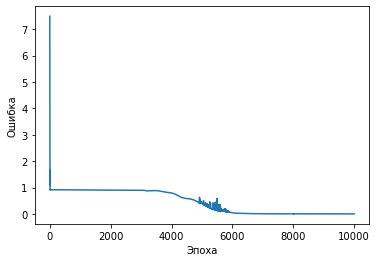

Я думаю, что это число  1
Я думаю, что это число  4
Я думаю, что это число  9
Я думаю, что это число  4
Я думаю, что это число  3
Я думаю, что это число  3
Я думаю, что это число  7
Я думаю, что это число  7
Я думаю, что это число  7
Я думаю, что это число  7
Я думаю, что это число  3
Я думаю, что это число  5
Я думаю, что это число  5
Я думаю, что это число  0
Я думаю, что это число  8
Я думаю, что это число  0


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
import threading
def f(x):
    return 1/(1+np.e**(-x))
def df(x):
    return f(x)*(1-f(x))



razmer = [[7,8], [8,7],[7,9],[9,10]]

vesa =[]
for i in range(len(razmer)):
    vesa.append(np.random.rand(razmer[i][0], razmer[i][1]))

N = 10000
e = 0.4


vchod = np.array([
    [1,1,1,0,1,1,1],
    [0,0,1,0,0,0,1],
    [0,1,1,1,1,1,0],
    [0,1,1,1,0,1,1],
    [1,0,1,1,0,0,1],
    [1,1,0,1,0,1,1],
    [1,1,0,1,1,1,1],
    [0,1,1,0,0,0,1],
    [1,1,1,1,1,1,1],
    [1,1,1,1,0,1,1]
])
vichod =  np.array([  [1,0,0,0,0,0,0,0,0,0],
                      [0,1,0,0,0,0,0,0,0,0],
                      [0,0,1,0,0,0,0,0,0,0],
                      [0,0,0,1,0,0,0,0,0,0],
                      [0,0,0,0,1,0,0,0,0,0],
                      [0,0,0,0,0,1,0,0,0,0],
                      [0,0,0,0,0,0,1,0,0,0],
                      [0,0,0,0,0,0,0,1,0,0],
                      [0,0,0,0,0,0,0,0,1,0],
                      [0,0,0,0,0,0,0,0,0,1]])

t = []
z= []
delta = []
for i in range(len(razmer)):
    t.append([])
    z.append([])
    delta.append([])



errors = []
for _ in range(N):

    error = 0
    for i in range(len(vchod)):
        imp = np.array([vchod[i]]).T
        t[0] = np.dot(vchod[i], np.array(vesa[0]))
        z[0] = f(t[0])
        for j in range(len(razmer) - 1):
            t[j + 1] = np.dot(np.array(z[j]), np.array(vesa[j + 1]))
            z[j + 1] = f(t[j + 1])

        error = sum((vichod[i] - z[len(razmer)-1]) * (vichod[i] - z[len(razmer)-1]))
        delta[len(razmer) - 1] = (vichod[i] - z[len(razmer) - 1]) * df(t[len(razmer) - 1])
        delta[len(razmer) - 1] = np.array([delta[len(razmer) - 1]])

        for p in range(len(razmer) - 2, -1, -1):
            delta[p] = np.dot(np.array(delta[p + 1]), (np.array(vesa[p + 1]).T)) * df(t[p])

        for q in range(len(razmer) - 1, 0, -1):
            vesa[q] = vesa[q] + e * np.dot((np.array([z[q - 1]]).T), np.array(delta[q]))

        vesa[0] = vesa[0] + e * np.dot(imp, delta[0])

        if _ ==N-1:
            l=0
            it = 0
            for k in z[3]:
                if round(k) == 1:
                    l = it
                it = it + 1
            print("Вывод НС",['%.2f' % round(elem) for elem in z[len(razmer) - 1] ], f" или {l} Эталонное значение: {vichod[i]} или {i}")
    errors.append(error)
def grafic():
    plt.plot(errors)
    plt.xlabel("Эпоха")
    plt.ylabel("Ошибка")
    plt.show()

t1 = threading.Thread(target=grafic, daemon=True)
t1.start()

def click(b):
    b['bg'] = "black" if b['bg'] == "white"  else "white"

def start():
    input_data = [b['bg'] == "black" for b in butons]
    input_data = np.array([input_data])
    t[0] = np.dot(input_data, np.array(vesa[0]))
    z[0] = f(t[0])
    for j in range(len(razmer) - 1):
        t[j + 1] = np.dot(np.array(z[j]), np.array(vesa[j + 1]))
        z[j + 1] = f(t[j + 1])
    print("Я думаю, что это число ", np.argmax(z[len(razmer) - 1]))
    label = tk.Label(root, text= f"Я думаю это { np.argmax(z[len(razmer) - 1])}", font=("Arial", 14), bg ='#1bcf84' ).place(x=310, y=240)

    # label.pack()

root = tk.Tk()
root.configure(bg='#1bcf84')
root.geometry("600x600")
butons = [
    tk.Button(root, bg = "white", width=2, height=8, command=lambda : click(butons[0])),
    tk.Button(root, bg = "white", width=20, height=1, command=lambda : click(butons[1])),
    tk.Button(root, bg = "white", width=2, height=8, command=lambda : click(butons[2])),
    tk.Button(root, bg = "white", width=20, height=1, command=lambda : click(butons[3])),
    tk.Button(root, bg = "white", width=2, height=8, command=lambda : click(butons[4])),
    tk.Button(root, bg = "white", width=20, height=1, command=lambda : click(butons[5])),
    tk.Button(root, bg = "white", width=2, height=8, command=lambda : click(butons[6]))
]
butons[0].place(x=25, y=50)
butons[1].place(x=50, y=25)
butons[2].place(x=200, y=50)
butons[3].place(x=50, y=180)
butons[4].place(x=25, y=205)
butons[5].place(x=50, y=335)
butons[6].place(x=200, y=205)
bstart = tk.Button(root, text="Что это за число?", width=20, height=2, command=start , bg = "#f011d9")
bstart.place(x=300, y=100)
root.mainloop()